In [190]:
# 공항별 운행 정보 분석
# 우리나라 사람 대부분이 인천, 김해, 김포 공항을 이용한다 
# ->그럼 다른 공항은 있으나 마나한 정도일까? 아님 단지 규모의 차이일까?
# 1. 항공기 운행수당 여객의 이용률을 통해 규모 대비 이용률을 산출한다
# 2. 공항이 있는 도시 또는 주변 도시의 인구수를 산출해서 인원수 대비 항공기 운행수를 산출한다
# 3.항공기 운행은 여객선을 기준으로 산출한다.

# 결론-> 위 정보를 토대로 계산해도 인천공항이 높다--> 어떤 차이떄문에?
        # 아님 다른 공항도 충분히 규모만큼 운영되고 있다

#사용한 데이터:
# https://www.airport.co.kr/www/cms/frFlightStatsCon/airportStats.do?MENU_ID=1250#none (한국공항공사)
# https://kosis.kr/search/search.do (국가통계포털)

In [191]:
# [1] 모듈 불러오기
import pandas as pd                     #데이터프레임 관리
import matplotlib.pyplot as plt             #데이터 시각화
from matplotlib import font_manager as fm
from matplotlib import rc                   #폰트 관리

In [192]:
# +++ 폰트 불러오기
font_file=r'C:\Windows\Fonts\batang.ttc'

# 폰트 패밀리
font_name= fm.FontProperties(fname=font_file).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family=font_name)


In [193]:
# [2] 데이터 불러오기
file_2019= '공항별_2019.xlsx'
file_2020= '공항별_2020.xlsx'
file_2021= '공항별_2021.xlsx'
file_2022= '공항별_2022.xlsx'
file_2023= '공항별_2023.xlsx'
DF_2020= pd.read_excel('공항별_2020.xlsx')
DF_2021= pd.read_excel('공항별_2021.xlsx')
DF_2022= pd.read_excel('공항별_2022.xlsx')
DF_2023= pd.read_excel('공항별_2023.xlsx')
DF_2019= pd.read_excel('공항별_2019.xlsx')

In [194]:
# [3] 데이터 전처리
DF_list= [DF_2019, DF_2020, DF_2021, DF_2022, DF_2023]
DF_2019

,Unnamed: 0,Unnamed: 1,Unnamed: 2,공항별 통계,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,검색 기간,2019.01~2019.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,공항 구분,전체,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,노선 구분,전체,운항 구분,전체,여객화물 구분,전체,여객 구분,전체,화물 구분,전체
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,공항명,운항(편),NaN,NaN,여객(명),NaN,NaN,화물(톤),NaN,NaN
6,NaN,도착,출발,계,도착,출발,계,도착,출발,계
7,김포,"70,192","70,230","140,422","12,759,118","12,689,298","25,448,416","122,511.2","130,884","253,395.1"
8,김해,"55,604","55,672","111,276","8,464,178","8,466,845","16,931,023","83,955.9","87,997.4","171,953.3"
9,제주,"87,669","87,697","175,366","15,657,540","15,658,854","31,316,394","121,197.4","137,649.1","258,846.5"


In [195]:
DF_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20 non-null     object
 1   Unnamed: 1  21 non-null     object
 2   Unnamed: 2  18 non-null     object
 3   공항별 통계      18 non-null     object
 4   Unnamed: 4  19 non-null     object
 5   Unnamed: 5  18 non-null     object
 6   Unnamed: 6  18 non-null     object
 7   Unnamed: 7  19 non-null     object
 8   Unnamed: 8  18 non-null     object
 9   Unnamed: 9  18 non-null     object
dtypes: object(10)
memory usage: 1.9+ KB


In [196]:
DF_list= [DF_2019, DF_2020, DF_2021, DF_2022, DF_2023]

# 반복문 돌리기
for list in DF_list:
   #필요없는 행, 열 삭제
    list.drop(index=[0,1,2,3,4,5,6], inplace=True)
    
    list.drop(columns=['Unnamed: 1', 'Unnamed: 2','Unnamed: 4',
       'Unnamed: 5','Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9' ], inplace=True)
    #컬럼명 변경
    list.columns=['', '운항(편)', '여객(명)']
   # 숫자 데이터로 변경
    list['여객(명)']= list['여객(명)'].str.replace(',','').astype(int)
    list['운항(편)']= list['운항(편)'].str.replace(',','').astype(int)
   #공항명을 인덱스로 설정
    list.set_index(list[''], inplace=True)
    list.drop(columns='', inplace=True)


In [197]:
for list in DF_list:
    print(list.head())

     운항(편)     여객(명)
                    
김포  140422  25448416
김해  111276  16931023
제주  175366  31316394
대구   31236   4669057
광주   13297   2026651
     운항(편)     여객(명)
                    
김포  113580  17446239
김해   53150   7235652
제주  138256  21054696
대구   12990   1749396
광주   13575   1726483
     운항(편)     여객(명)
                    
김포  138855  22525417
김해   57694   8859304
제주  160230  25802550
대구   13294   2048365
광주   14764   2152892
     운항(편)     여객(명)
                    
김포  143713  24524065
김해   61733  10027097
제주  169624  29703662
대구   13472   2255883
광주   12916   2068625
     운항(편)     여객(명)
                    
김포  134560  23424158
김해   82185  13694710
제주  167086  29096271
대구   20244   3302107
광주   13277   2050378


In [198]:
# 결측치 확인
for list in DF_list:
    print(list.isna().sum())
    print(list.duplicated().sum(), end='\n\n')
# 결측치, 중복치 없음 

운항(편)    0
여객(명)    0
dtype: int64
0

운항(편)    0
여객(명)    0
dtype: int64
0

운항(편)    0
여객(명)    0
dtype: int64
0

운항(편)    0
여객(명)    0
dtype: int64
0

운항(편)    0
여객(명)    0
dtype: int64
0



In [199]:
# [4] 데이터 분석
# 1. 항공기 운행수당 여객의 이용률을 통해 규모 대비 이용률 산출

In [200]:
#운행편당 여객 이용수 컬럼 추가 및 추가된 컬럼을 기준으로 오름차순 정렬 
year=2019
for list in DF_list:
    list['운항편수당 이용고객 수']= list['여객(명)']/list['운항(편)']
    list['연도']= year
    list.sort_values(by='운항편수당 이용고객 수', ascending=False, inplace=True)
    print(list.head(3))
    year=year+1

     운항(편)     여객(명)  운항편수당 이용고객 수    연도
                                        
김포  140422  25448416    181.228127  2019
제주  175366  31316394    178.577341  2019
인천  404104  71169722    176.117341  2019
     운항(편)     여객(명)  운항편수당 이용고객 수    연도
                                        
김포  113580  17446239    153.603090  2020
제주  138256  21054696    152.287756  2020
청주   13625   1970863    144.650495  2020
     운항(편)     여객(명)  운항편수당 이용고객 수    연도
                                        
김포  138855  22525417    162.222585  2021
제주  160230  25802550    161.034450  2021
대구   13294   2048365    154.081917  2021
     운항(편)     여객(명)  운항편수당 이용고객 수    연도
                                        
제주  169624  29703662    175.114736  2022
청주   18516   3174649    171.454364  2022
김포  143713  24524065    170.646114  2022
     운항(편)      여객(명)  운항편수당 이용고객 수    연도
                                         
제주  167086   29096271    174.139491  2023
김포  134560   23424158    174.079652  2023
합계  793427  

In [201]:
print(DF_2022.describe())
DF_2022.head(3)

               운항(편)         여객(명)  운항편수당 이용고객 수      연도
count      16.000000  1.600000e+01     16.000000    16.0
mean    76956.500000  1.160499e+07    144.323018  2022.0
std    156554.800216  2.364964e+07     25.191535     0.0
min       192.000000  2.939400e+04     99.209626  2022.0
25%      2639.250000  3.508348e+05    128.839397  2022.0
50%      9994.000000  1.539479e+06    151.814787  2022.0
75%     82228.000000  1.198776e+07    163.682578  2022.0
max    615652.000000  9.283988e+07    175.114736  2022.0


,운항(편),여객(명),운항편수당 이용고객 수,연도
,,,,
제주,169624,29703662,175.114736,2022
청주,18516,3174649,171.454364,2022
김포,143713,24524065,170.646114,2022


In [202]:
DF_total= pd.concat([DF_list[0], DF_list[1], DF_list[2], DF_list[3], DF_list[4]])
DF_total= DF_total.set_index('연도', append=True).sort_index()

DF_total_group= DF_total.groupby('연도')

DF_total

운항(편)      여객(명)  운항편수당 이용고객 수
   연도                                   
광주 2019   13297    2026651    152.414154
   2020   13575    1726483    127.181068
   2021   14764    2152892    145.820374
   2022   12916    2068625    160.159879
   2023   13277    2050378    154.430820
...         ...        ...           ...
합계 2019  918941  157673444    171.581684
   2020  511980   65027063    127.010944
   2021  556830   70003126    125.717231
   2022  615652   92839882    150.799286
   2023  793427  133588039    168.368406

[80 rows x 3 columns]

In [203]:
DF_total_group.mean()

,운항(편),여객(명),운항편수당 이용고객 수
연도,,,
2019,114867.625,1.970918e+07,143.984742
2020,63997.500,8.128383e+06,116.294415
2021,69603.750,8.750391e+06,116.795912
2022,76956.500,1.160499e+07,144.323018
2023,99178.375,1.669850e+07,152.002987


In [204]:
DF_total.info()
DF_total.to_csv('./운행기_대비_이용률.csv', encoding='utf-8-sig')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 80 entries, ('광주', 2019) to ('합계', 2023)
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   운항(편)         80 non-null     int32  
 1   여객(명)         80 non-null     int32  
 2   운항편수당 이용고객 수  80 non-null     float64
dtypes: float64(1), int32(2)
memory usage: 2.4+ KB


In [205]:
# 운행편의 수를 통한 공항의 규모 비교
for df in DF_list:
    print(df.sort_values(by='운항(편)', ascending=False).index)

Index(['합계', '인천', '제주', '김포', '김해', '대구', '청주', '광주', '울산', '무안', '여수', '군산',
       '사천', '포항경주', '원주', '양양'],
      dtype='object', name='')
Index(['합계', '인천', '제주', '김포', '김해', '청주', '광주', '대구', '여수', '울산', '양양', '군산',
       '무안', '포항경주', '원주', '사천'],
      dtype='object', name='')
Index(['합계', '제주', '김포', '인천', '김해', '청주', '광주', '대구', '여수', '울산', '군산', '양양',
       '포항경주', '원주', '무안', '사천'],
      dtype='object', name='')
Index(['합계', '인천', '제주', '김포', '김해', '청주', '대구', '광주', '여수', '울산', '양양', '군산',
       '포항경주', '원주', '사천', '무안'],
      dtype='object', name='')
Index(['합계', '인천', '제주', '김포', '김해', '청주', '대구', '광주', '여수', '울산', '포항경주',
       '사천', '무안', '원주', '양양', '군산'],
      dtype='object', name='')


In [206]:
# 5개년 합으로 비교
idx=0
for df in DF_list:
    a= df.sort_values(by='운항(편)', ascending=False)['운항(편)']
    if idx>0:
        c= pd.concat([a,c])
    else:
        c=a.copy()
pd.DataFrame(c).sort_values(by='운항(편)', ascending=False).index

Index(['합계', '인천', '제주', '김포', '김해', '청주', '대구', '광주', '여수', '울산', '포항경주',
       '사천', '무안', '원주', '양양', '군산'],
      dtype='object', name='')

In [207]:
#합계를 제외한 리스트 생성
DF_2019N=DF_2019.copy(); DF_2020N=DF_2020.copy(); DF_2021N=DF_2021.copy();DF_2022N=DF_2022.copy()
DF_2023N=DF_2023.copy()
DF_list_N= [DF_2019N, DF_2020N, DF_2021N, DF_2022N, DF_2023N]
for list in DF_list_N:
    list.drop(index='합계', inplace=True)
    list.sort_index(axis=0, inplace=True)
    list['color']=['#FF0000', '#0054FF', '#3DB7CC', '#000000', '#FFE400',
                    '#FFB2D9', '#5D1037', '#005766', '#662500','#FFD9EC',
                    '#5F00FF', '#F29661',  '#FFFFCD', '#004A00', '#BDBDBD'
                   ]

In [208]:
DF_2019N.head()

,운항(편),여객(명),운항편수당 이용고객 수,연도,color
,,,,,
광주,13297,2026651,152.414154,2019,#FF0000
군산,1955,306518,156.786701,2019,#0054FF
김포,140422,25448416,181.228127,2019,#3DB7CC
김해,111276,16931023,152.153411,2019,#000000
대구,31236,4669057,149.476790,2019,#FFE400


In [209]:
# plt.barh(DF_2019N.index, DF_2019N['운항편수당 이용고객 수'], color = DF_2019N['color'] )
# plt.title('2019-여객수/운행수')


In [210]:
DF_2019N.sort_values('운항편수당 이용고객 수', ascending=False)

,운항(편),여객(명),운항편수당 이용고객 수,연도,color
,,,,,
김포,140422,25448416,181.228127,2019,#3DB7CC
제주,175366,31316394,178.577341,2019,#FFFFCD
인천,404104,71169722,176.117341,2019,#F29661
청주,18648,3009051,161.360521,2019,#004A00
군산,1955,306518,156.786701,2019,#0054FF
광주,13297,2026651,152.414154,2019,#FF0000
김해,111276,16931023,152.153411,2019,#000000
대구,31236,4669057,149.476790,2019,#FFE400
무안,6585,895410,135.977221,2019,#FFB2D9


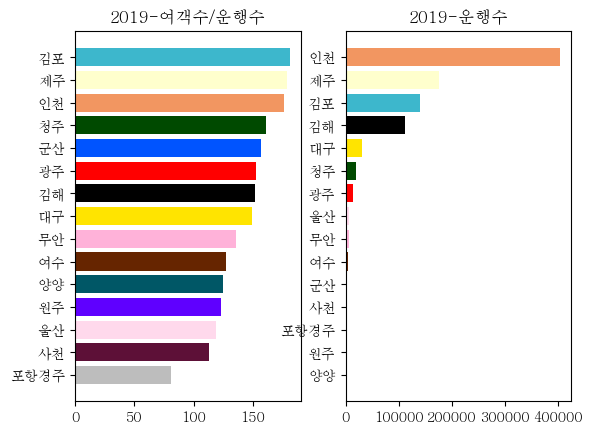

In [211]:
#2019
fig19= plt.figure()
ax1=fig19.add_subplot(1,2, 1)
for list in DF_list_N:
    list.sort_values(by= '운항편수당 이용고객 수', inplace=True)

ax1.barh(DF_2019N.index, DF_2019N['운항편수당 이용고객 수'], color = DF_2019N['color'] )
ax1.set_title('2019-여객수/운행수')

for list in DF_list_N:
    list.sort_values(by= '운항(편)', inplace=True)

ax2=fig19.add_subplot(1,2, 2)
ax2.barh(DF_2019N.index, DF_2019N['운항(편)'],color = DF_2019N['color'])
ax2.set_title('2019-운행수')
plt.show()

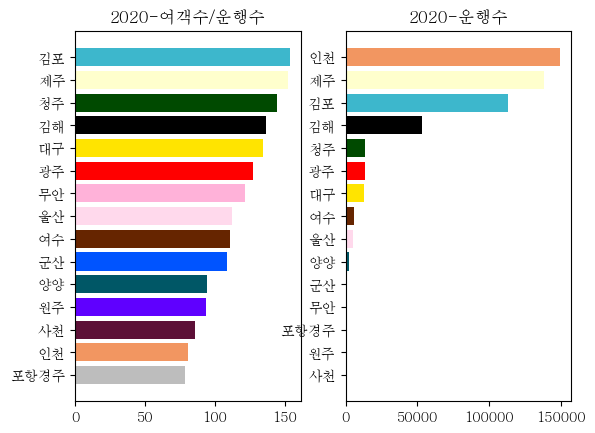

In [212]:
#2020
fig20= plt.figure()
ax1=fig20.add_subplot(1,2, 1)
for list in DF_list_N:
    list.sort_values(by= '운항편수당 이용고객 수', inplace=True)

ax1.barh(DF_2020N.index, DF_2020N['운항편수당 이용고객 수'],color = DF_2020N['color'])
ax1.set_title('2020-여객수/운행수')

for list in DF_list_N:
    list.sort_values(by= '운항(편)', inplace=True)
ax2=fig20.add_subplot(1,2, 2)

ax2.barh(DF_2020N.index, DF_2020N['운항(편)'],color = DF_2020N['color'])
ax2.set_title('2020-운행수')
plt.show()

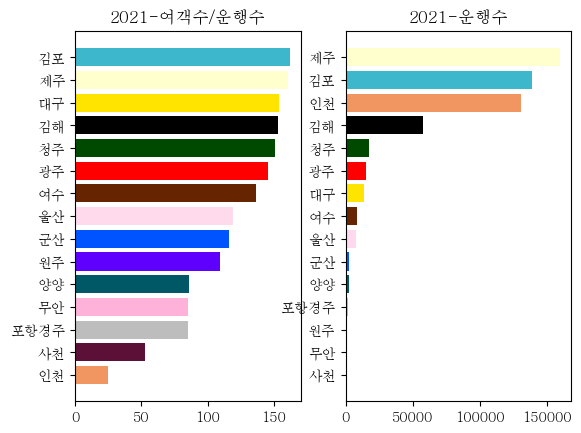

In [213]:
#2021
fig21= plt.figure()
ax1=fig21.add_subplot(1,2, 1)
for list in DF_list_N:
    list.sort_values(by= '운항편수당 이용고객 수', inplace=True)

ax1.barh(DF_2021N.index, DF_2021N['운항편수당 이용고객 수'],color = DF_2021N['color'])
ax1.set_title('2021-여객수/운행수')

for list in DF_list_N:
    list.sort_values(by= '운항(편)', inplace=True)
ax2=fig21.add_subplot(1,2, 2)

ax2.barh(DF_2021N.index, DF_2021N['운항(편)'],color = DF_2021N['color'])
ax2.set_title('2021-운행수')
plt.show()


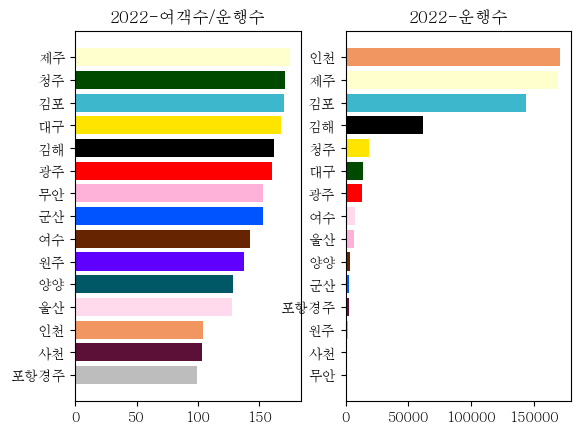

In [214]:
#2022
fig22= plt.figure()
ax1=fig22.add_subplot(1,2, 1)
for list in DF_list_N:
    list.sort_values(by= '운항편수당 이용고객 수', inplace=True)

ax1.barh(DF_2022N.index, DF_2022N['운항편수당 이용고객 수'],color = DF_2022N['color'])
ax1.set_title('2022-여객수/운행수')

for list in DF_list_N:
    list.sort_values(by= '운항(편)', inplace=True)
ax2=fig22.add_subplot(1,2, 2)

ax2.barh(DF_2022N.index, DF_2022N['운항(편)'],color = DF_2019N['color'])
ax2.set_title('2022-운행수')
plt.show()

In [215]:
DF_2023['운항편수당 이용고객 수']


제주      174.139491
김포      174.079652
합계      168.368406
김해      166.632719
인천      166.413372
청주      163.915909
대구      163.115343
무안      157.235175
광주      154.430820
군산      153.860320
원주      148.860769
여수      133.618198
양양      128.830495
울산      127.602616
사천      127.367785
포항경주    123.576717
Name: 운항편수당 이용고객 수, dtype: float64

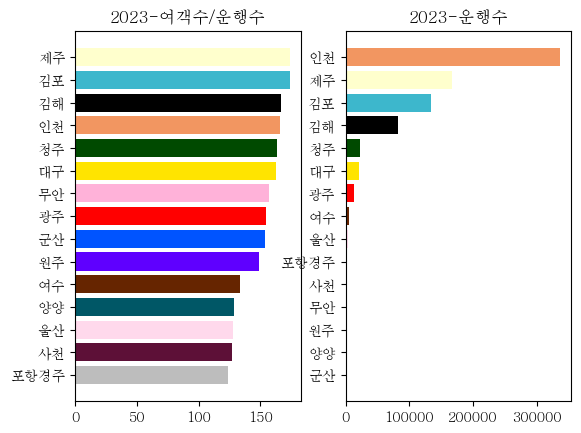

In [216]:
#2023
fig23= plt.figure()
ax1=fig23.add_subplot(1,2, 1)
for list in DF_list_N:
    list.sort_values(by= '운항편수당 이용고객 수', inplace=True)

ax1.barh(DF_2023N.index, DF_2023N['운항편수당 이용고객 수'],color = DF_2023N['color'])
ax1.set_title('2023-여객수/운행수')

for list in DF_list_N:
    list.sort_values(by= '운항(편)', inplace=True)
ax2=fig23.add_subplot(1,2, 2)
ax2.barh(DF_2023N.index, DF_2023N['운항(편)'],color = DF_2023N['color'])
ax2.set_title('2023-운행수')
plt.show()

-인천
 *코로나 사태+ 면세점 철수 문로 인해 코로나 기간 중 이용규모가 감소함

In [217]:
# [2] 주변 도시의 인구수 대비 운행수 시각화

In [218]:
# 인구수 데이터 로딩
file=('인구수_수정.xlsx')
DF= pd.read_excel(file)
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   공항명     13 non-null     object
 1   2019    13 non-null     int64 
 2   2020    13 non-null     int64 
 3   2021    13 non-null     int64 
 4   2022    13 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 648.0+ bytes


In [219]:
DF.set_index('공항명', drop=True, inplace=True)

In [220]:
DF.head()

,2019,2020,2021,2022
공항명,,,,
대구,2429940,2410700,2387911,2366852
인천,2952237,2945454,2957044,2989125
광주,1489730,1477573,1475262,1468972
울산,1143692,1135423,1120753,1110516
김포,13300900,13511676,13652529,13717827


In [221]:
DF.sort_index(axis=0, inplace=True)
DF['color']=['#FF0000', '#0054FF', '#3DB7CC', '#000000', '#FFE400',
                    '#FFB2D9', '#5D1037', '#005766', '#662500','#FFD9EC',
                    '#5F00FF', '#F29661',  '#FFFFCD'
                   ]
DF_graph= DF.copy()

In [222]:
# 없는 행 제거  (양양, 원주)
DF_2019N.drop(index=['양양', '원주'], inplace=True)
DF_2020N.drop(index=['양양', '원주'], inplace=True)
DF_2021N.drop(index=['양양', '원주'], inplace=True)
DF_2022N.drop(index=['양양', '원주'], inplace=True)

In [223]:
DF

,2019,2020,2021,2022,color
공항명,,,,,
광주,1489730,1477573,1475262,1468972,#FF0000
군산,1807423,1802766,1787053,1774248,#0054FF
김포,13300900,13511676,13652529,13717827,#3DB7CC
김해,3347209,3333056,3305931,3280829,#000000
대구,2429940,2410700,2387911,2366852,#FFE400
무안,1787543,1788807,1778124,1771431,#FFB2D9
사천,3347209,3333056,3305931,3280829,#5D1037
여수,1787543,1788807,1778124,1771431,#005766
울산,1143692,1135423,1120753,1110516,#662500


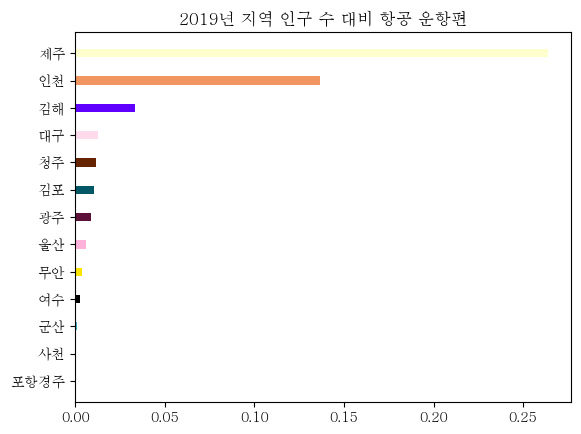

In [224]:
#2019
DF_graph['2019']= DF_2019N['운항(편)']/DF['2019']
DF_graph.sort_values(by='2019', ascending=True, inplace=True)

for idx in DF.index.to_list()[:]:
    plt.barh(DF_graph.index, DF_graph['2019'], height=0.3,color= DF['color'])
plt.title("2019년 지역 인구 수 대비 항공 운항편")
plt.show()

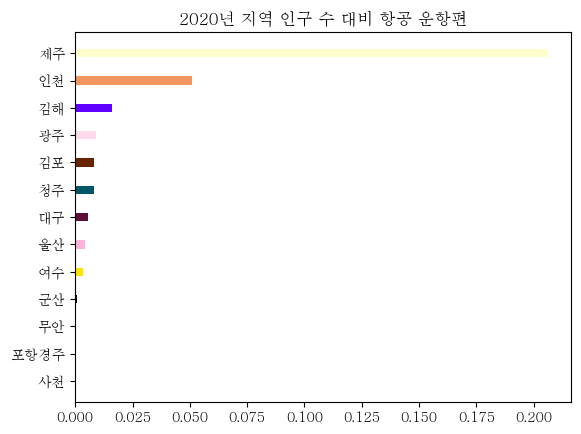

In [225]:
#2020

DF_graph['2020']= DF_2020N['운항(편)']/DF['2020']
DF_graph.sort_values(by='2020', ascending=True, inplace=True)


plt.barh(DF_graph.index, DF_graph['2020'], height=0.3,color= DF['color'])
plt.title("2020년 지역 인구 수 대비 항공 운항편")
plt.show()

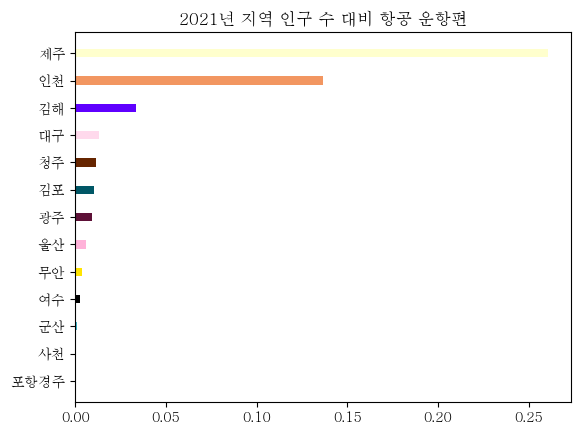

In [226]:
#2021

DF_graph['2021']= DF_2019N['운항(편)']/DF['2021']
DF_graph.sort_values(by='2021', ascending=True, inplace=True)

plt.barh(DF_graph.index, DF_graph['2021'], height=0.3,color= DF['color'])
plt.title("2021년 지역 인구 수 대비 항공 운항편")
plt.show()

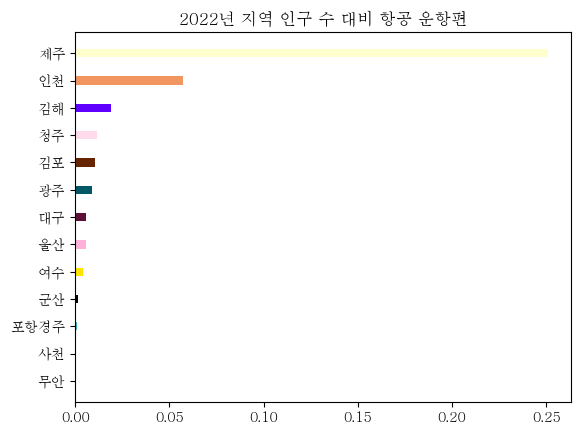

In [227]:
#2022

DF_graph['2022']= DF_2022N['운항(편)']/DF['2022']
DF_graph.sort_values(by='2022', ascending=True, inplace=True)

plt.barh(DF_graph.index, DF_graph['2022'], height=0.3,color= DF['color'])
plt.title("2022년 지역 인구 수 대비 항공 운항편")
plt.show()

In [ ]:
# 코로나 특수성 때문에 값을 비교하는게 의미가 크지 않다
# 공항 규모를 감안하더라도 규모의 경제, 접근성 등으로 인해 큰 공항의 이용률이 전체적으로 높은 것으로 나타났다